<a href="https://colab.research.google.com/github/gagalyash/Bank-Churn-Prediction/blob/main/Bank_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download the data using opendatasets

In [63]:
!pip install opendatasets --quiet

In [64]:
import opendatasets as od

In [65]:
dataset_url = 'https://www.kaggle.com/datasets/santoshd3/bank-customers'

In [66]:
od.download(dataset_url)

Skipping, found downloaded files in "./bank-customers" (use force=True to force download)


In [67]:
import os

In [68]:
data_dir = './bank-customers'

In [69]:
os.listdir(data_dir)

['Churn Modeling.csv']

In [70]:
train_csv = data_dir + '/Churn Modeling.csv'

### Necessary Libraries for Analysing and visualization

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
# Read the data through pandas
data = pd.read_csv(train_csv)

In [73]:
# Prints the first five rows
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [144]:
# Prints the shape of the data
data.shape

(10000, 11)

In [74]:
# Prints the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [75]:
# Prints the null value in the data
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [76]:
# Drop the un-necessary column from the data 
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [143]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [77]:
# Prints the unique value in the data
print(data['Geography'].unique())
print(data['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [78]:
# Prints the statistical measures
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [79]:
# Prints the co-relation matrix
data.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


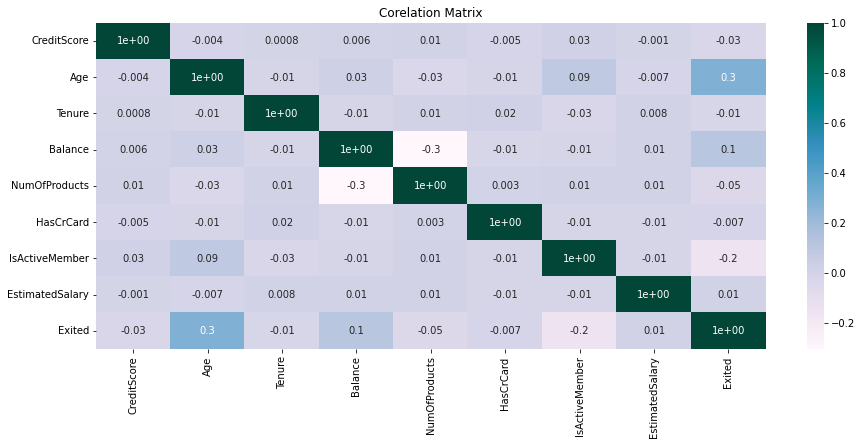

In [80]:
plt.figure(figsize=(15,6))
plt.title('Corelation Matrix')
sns.heatmap(data.corr(), 
            annot=True, 
            fmt='0.01', 
            cbar=True, 
            cmap='PuBuGn');

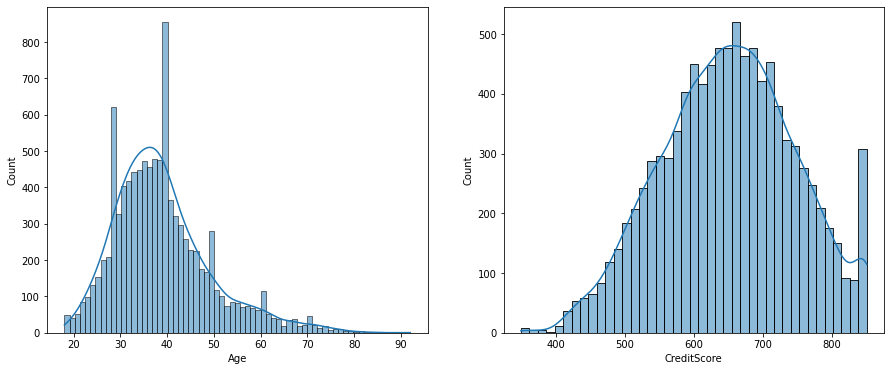

In [101]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(x=data['Age'], kde=True)
plt.subplot(1,2,2)
sns.histplot(x=data['CreditScore'], kde=True);

In [81]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

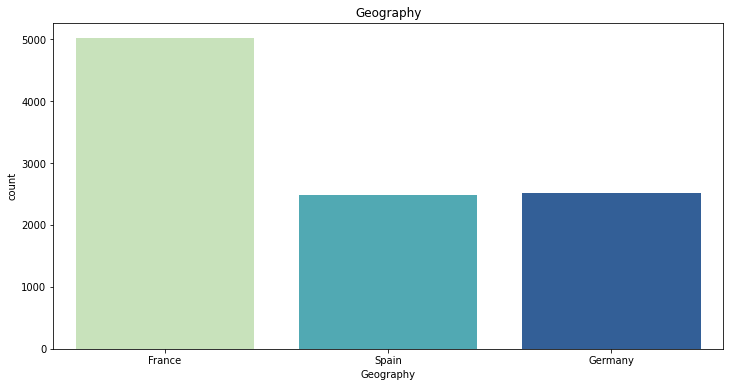

In [82]:
plt.figure(figsize=(12,6))
plt.title('Geography')
sns.countplot(data=data, x='Geography', palette='YlGnBu');

In [83]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

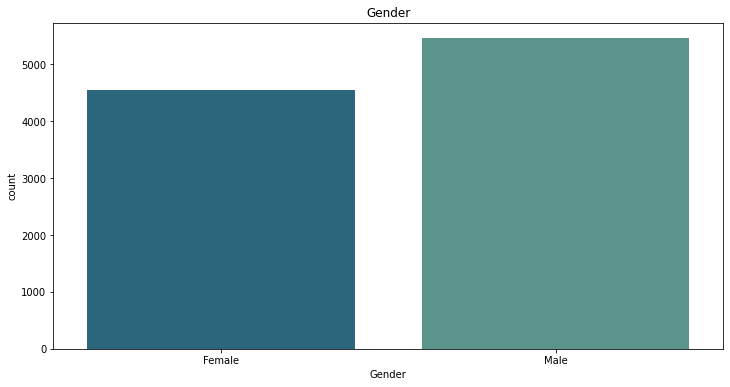

In [84]:
plt.figure(figsize=(12,6))
plt.title('Gender')
sns.countplot(data=data, x='Gender', palette='crest_r');

In [85]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

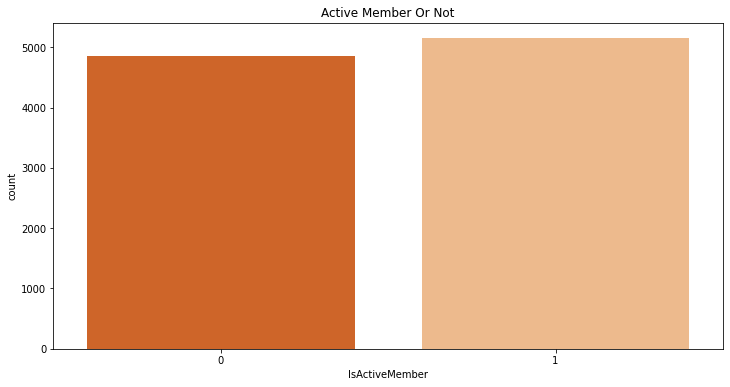

In [103]:
plt.figure(figsize=(12,6))
plt.title('Active Member Or Not')
sns.countplot(data=data, x='IsActiveMember', palette='Oranges_r');

In [87]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

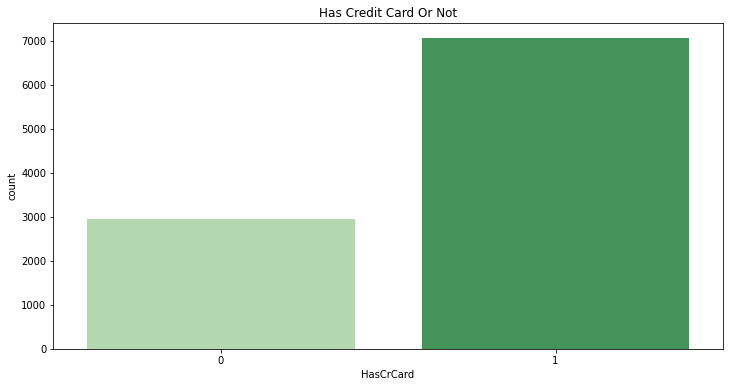

In [102]:
plt.figure(figsize=(12,6))
plt.title('Has Credit Card Or Not')
sns.countplot(data=data, x='HasCrCard', palette='Greens');

In [89]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

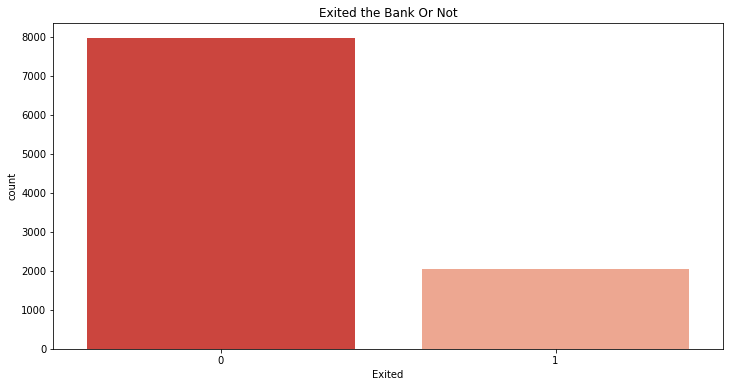

In [104]:
plt.figure(figsize=(12,6))
plt.title('Exited the Bank Or Not')
sns.countplot(data=data, x='Exited', palette='Reds_r');

In [91]:
data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

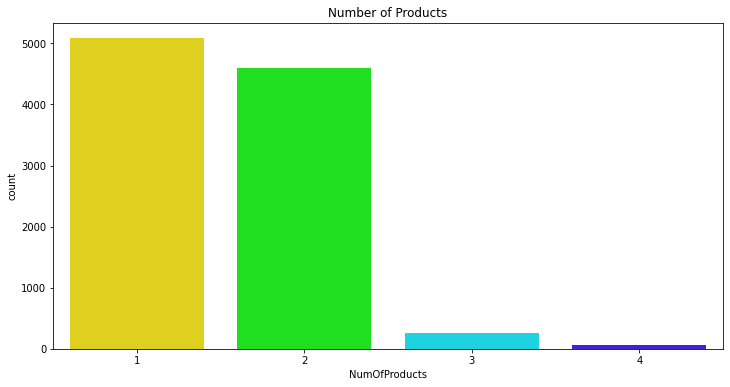

In [92]:
plt.figure(figsize=(12,6))
plt.title('Number of Products')
sns.countplot(data=data, x='NumOfProducts', palette='gist_rainbow');

In [107]:
pd.crosstab(data['Gender'], data['Exited'])

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


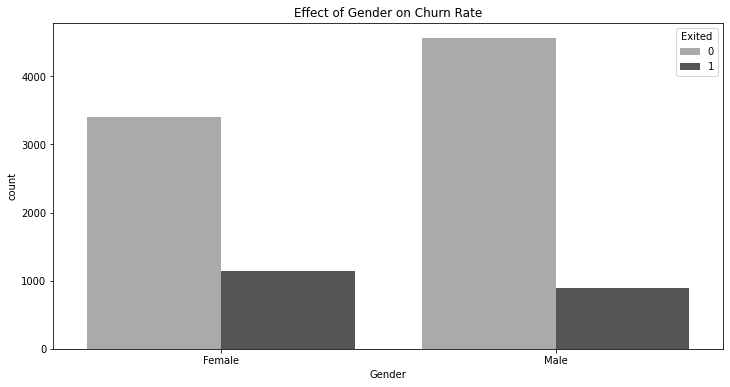

In [106]:
plt.figure(figsize=(12,6))
plt.title('Effect of Gender on Churn Rate')
sns.countplot(data=data, x=data['Gender'], hue=data['Exited'], palette='gist_yarg');

### Insight
It appears that female customers are slightly more likely to churn from the bank across all three countries.

In [108]:
pd.crosstab(data['Gender'], data['HasCrCard'])

HasCrCard,0,1
Gender,,
Female,1351,3192
Male,1594,3863


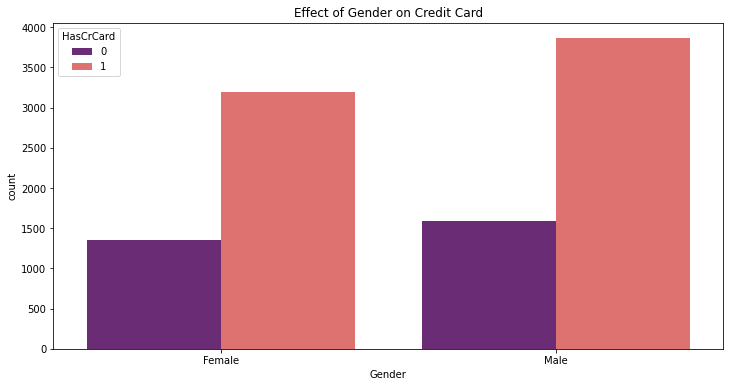

In [109]:
plt.figure(figsize=(12,6))
plt.title('Effect of Gender on Credit Card')
sns.countplot(data=data, x=data['Gender'], hue=data['HasCrCard'], palette='magma');

### Insight
It appears that Male customers are slightly more likely to churn the credit card across all three countries.

### Encoding the categorical columns using LabelEncoder

In [112]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Geography'] = le.fit_transform(data['Geography'])

In [113]:
X = data.drop(['Exited'], axis=1)
Y = data['Exited']

### Splitting the dataset into training data and test data

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [117]:
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('Y_train :', Y_train.shape)
print('Y_test :', Y_test.shape)

X_train : (8000, 10)
X_test : (2000, 10)
Y_train : (8000,)
Y_test : (2000,)


### Scaling data using Standard Scaler

In [118]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

In [121]:
print('X_train_ss :', X_train_ss.shape)
print('X_test_ss :', X_test_ss.shape)

X_train_ss : (8000, 10)
X_test_ss : (2000, 10)


In [123]:
import tensorflow as tf
from tensorflow import keras

### Model Building Using ANN

In [130]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(14, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_ss, Y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5127 - accuracy: 0.7721
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4428 - accuracy: 0.8080
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4104 - accuracy: 0.8249
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3864 - accuracy: 0.8390
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3694 - accuracy: 0.8465
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3613 - accuracy: 0.8501
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3572 - accuracy: 0.8518
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3535 - accuracy: 0.8530
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3515 - accuracy: 0.8544
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3500 - accuracy: 0.8570

In [131]:
model.evaluate(X_test_ss, Y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8495


[0.3617595434188843, 0.8495000004768372]

In [135]:
Y_predict = model.predict(X_test_ss)
Y_predict[:10]

array([[0.07699633],
       [0.574275  ],
       [0.18007141],
       [0.00859106],
       [0.02929688],
       [0.00483745],
       [0.16210398],
       [0.01678801],
       [0.97352016],
       [0.03289321]], dtype=float32)

In [137]:
Y_pred = []
for i in Y_predict:
  if i > 0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)

In [138]:
Y_pred[:10]

[0, 1, 0, 0, 0, 0, 0, 0, 1, 0]

### Classification Report

In [142]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1617
           1       0.66      0.44      0.53       383

    accuracy                           0.85      2000
   macro avg       0.77      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000

